# Final Year Project
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# WatchYourLanguage
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Intelligent Text Reader with Normalized Text 
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Group Members : 
##### Sibtain Raza Jamali
##### Zeeshan Ali
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### SuperVisor:
### Mr.Muhammad H Mustafa

#### This is an intelligent text-to-speech synthesizer. The first goal to achieve is  "Spoken Text".

# Iteration 1 

In [1]:
# lets start by importing some basic python libraries for analysis of data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning,Visualization ,Statistics


In [2]:
"""
This dataset is well structured ,lets import all the files
"""
training_set=pd.read_csv('en_train.csv')
training_set.head(15)

,sentence_id,token_id,class,before,after
0,0,0,PLAIN,Brillantaisia,Brillantaisia
1,0,1,PLAIN,is,is
2,0,2,PLAIN,a,a
3,0,3,PLAIN,genus,genus
4,0,4,PLAIN,of,of
5,0,5,PLAIN,plant,plant
6,0,6,PLAIN,in,in
7,0,7,PLAIN,family,family
8,0,8,PLAIN,Acanthaceae,Acanthaceae
9,0,9,PUNCT,.,.


In [3]:
training_set.shape

(9918441, 5)

Lets find some basic statistics of training set

In [4]:
training_set.describe()

,sentence_id,token_id
count,9.918441e+06,9.918441e+06
mean,3.778565e+05,7.519584e+00
std,2.151371e+05,6.117934e+00
min,0.000000e+00,0.000000e+00
25%,1.925260e+05,3.000000e+00
50%,3.792590e+05,6.000000e+00
75%,5.641890e+05,1.100000e+01
max,7.480650e+05,2.550000e+02


Removing the Null values if any 

In [5]:
training_set['before'].isnull().sum()

51

Oops! it contains 51 null values , lets see whether we need to drop those values or fix them

In [6]:
(training_set[training_set['before'].isnull()])

,sentence_id,token_id,class,before,after
616107,49226,17,LETTERS,NaN,n a
684691,54634,1,PLAIN,NaN,NaN
965529,76612,7,PLAIN,NaN,NaN
1011291,80126,5,LETTERS,NaN,n a
1347924,106058,6,PLAIN,NaN,NaN
1909700,149031,16,PLAIN,NaN,NaN
1999090,155865,4,PLAIN,NaN,NaN
2465002,191397,1,PLAIN,NaN,NaN
2765431,214094,1,PLAIN,NaN,NaN
3049822,235589,6,PLAIN,NaN,NaN


Lets examine a sentence with Nan Values 

In [7]:
training_set[training_set['sentence_id']==149031]

,sentence_id,token_id,class,before,after
1909684,149031,0,PLAIN,Salmon,Salmon
1909685,149031,1,PLAIN,DA,DA
1909686,149031,2,PUNCT,",",","
1909687,149031,3,PLAIN,Teret,Teret
1909688,149031,4,LETTERS,SP,s p
1909689,149031,5,PUNCT,",",","
1909690,149031,6,PLAIN,MacIntyre,MacIntyre
1909691,149031,7,LETTERS,CR,c r
1909692,149031,8,PUNCT,",",","
1909693,149031,9,PLAIN,Salisbury,Salisbury


### If we remove these values , from our data set , the information from columns of 'token id' and 'Sentence Id' will become redundant and can cause our model to behave abnormal, so it will be better to replace the Nan values with a space for now.

In [8]:
training_set.loc[training_set['before'].isnull(),['before','after']]=' '
training_set[training_set['sentence_id']==149031]

,sentence_id,token_id,class,before,after
1909684,149031,0,PLAIN,Salmon,Salmon
1909685,149031,1,PLAIN,DA,DA
1909686,149031,2,PUNCT,",",","
1909687,149031,3,PLAIN,Teret,Teret
1909688,149031,4,LETTERS,SP,s p
1909689,149031,5,PUNCT,",",","
1909690,149031,6,PLAIN,MacIntyre,MacIntyre
1909691,149031,7,LETTERS,CR,c r
1909692,149031,8,PUNCT,",",","
1909693,149031,9,PLAIN,Salisbury,Salisbury


In [9]:
training_set['before'].isnull().sum()
training_set[training_set['sentence_id']==149031]

,sentence_id,token_id,class,before,after
1909684,149031,0,PLAIN,Salmon,Salmon
1909685,149031,1,PLAIN,DA,DA
1909686,149031,2,PUNCT,",",","
1909687,149031,3,PLAIN,Teret,Teret
1909688,149031,4,LETTERS,SP,s p
1909689,149031,5,PUNCT,",",","
1909690,149031,6,PLAIN,MacIntyre,MacIntyre
1909691,149031,7,LETTERS,CR,c r
1909692,149031,8,PUNCT,",",","
1909693,149031,9,PLAIN,Salisbury,Salisbury


Now we have replaced Nan values with a space

Lets deep dive into data

# Training Data
### Number of training Examples = 9918441
### Number of features = 5

In [10]:
len(training_set['class'].unique())

16

There are 16 distinct classes of words

In [11]:
#lets print these classes 
training_set['class'].value_counts()

PLAIN         7353693
PUNCT         1880507
DATE           258348
LETTERS        152795
CARDINAL       133744
VERBATIM        78108
MEASURE         14783
ORDINAL         12703
DECIMAL          9821
MONEY            6128
DIGIT            5442
ELECTRONIC       5162
TELEPHONE        4024
TIME             1465
FRACTION         1196
ADDRESS           522
Name: class, dtype: int64

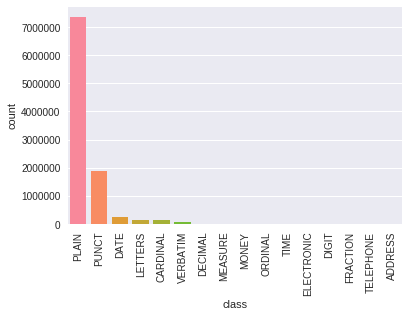

In [12]:
#sns.set_palette("hls")
#fig_size=(11,8)
#fig,axe=plt.subplots(figsize=fig_size)
sns.set_style("darkgrid")
figs=sns.countplot(training_set['class'],saturation=1)

figs.set_xticklabels(training_set['class'].unique(),rotation=90)
plt.show()

We can see seaborn is missing many distributions, So lets try bar plot

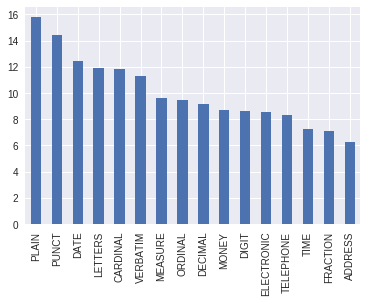

In [13]:
#taking log will normalize the values
np.log(training_set['class'].value_counts()).plot(kind='bar')
plt.show()

Lets see what type of words these classes contains

In [14]:
training_set[training_set['class']=='PLAIN'].sample(5)

,sentence_id,token_id,class,before,after
301438,24256,4,PLAIN,the,the
9098531,687253,5,PLAIN,collateralized,collateralized
8882241,671269,2,PLAIN,destroyed,destroyed
233855,18855,6,PLAIN,rock,rock
4204780,322672,15,PLAIN,the,the


Plain text contains normal words that remains same even after normalization is performed

In [15]:
training_set[training_set['class']=='PUNCT'].sample(10)

,sentence_id,token_id,class,before,after
1255412,98886,8,PUNCT,",",","
8953685,676550,6,PUNCT,.,.
8363339,633044,4,PUNCT,(,(
5412197,413179,5,PUNCT,"""",""""
8469068,640854,18,PUNCT,.,.
6268157,477008,5,PUNCT,"""",""""
373873,30047,3,PUNCT,;,;
4062974,312077,10,PUNCT,",",","
4260291,326854,19,PUNCT,.,.
712436,56822,18,PUNCT,;,;


Are both PLAIN and PUNCT class behaving the same? 
Why not have a test?
We will see how many punct class words have changed in after column

In [16]:
training_set['change']=training_set['before']!=training_set['after']


In [22]:
training_set[(training_set['class']=='PUNCT') & (training_set['change']==True)]

,sentence_id,token_id,class,before,after,change


Here we can conclude that PUNCT class doesn't need to be normalized

We have a better idea lets examine which class changes with high frequency for this purpose we will add each change value by groupby clause 

In [38]:
change_per_class=training_set['change'].groupby(training_set['class'])

In [39]:
frequency_of_change=change_per_class.sum()

OMG! Our previous observation was wrong about data , We can see that PLAIN class has changed its values for 36472 times
Are you Interseted To have a look at those examples? Yes

In [24]:
training_set[(training_set['class']=='PLAIN') & (training_set['change']==True)].head(20)

,sentence_id,token_id,class,before,after,change
142,10,7,PLAIN,vol,volume,True
165,14,8,PLAIN,vs,versus,True
535,43,6,PLAIN,PbSO4,lead two sulphate,True
556,44,6,PLAIN,-,to,True
651,49,16,PLAIN,st,saint,True
776,58,7,PLAIN,-,to,True
790,59,11,PLAIN,st,saint,True
1054,81,0,PLAIN,vol,volume,True
1063,81,9,PLAIN,vol,volume,True
1091,84,5,PLAIN,colour,color,True


ValueError: could not convert string to float: VERBATIM

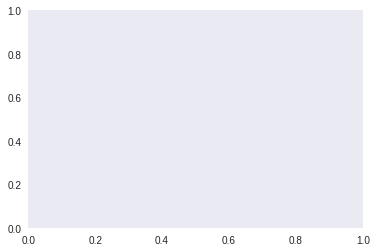

<bound method Series.keys of class
ADDRESS          522.0
CARDINAL      133744.0
DATE          258348.0
DECIMAL         9821.0
DIGIT           5442.0
ELECTRONIC      4964.0
FRACTION        1196.0
LETTERS       144364.0
MEASURE        14761.0
MONEY           6125.0
ORDINAL        12703.0
PLAIN          36472.0
PUNCT              0.0
TELEPHONE       4024.0
TIME            1465.0
VERBATIM       25837.0
Name: change, dtype: float64>